### Introduction
Continuous Stirred-Tank Reactors (CSTRs) are widely used in the chemical industry for carrying out various chemical reactions. The optimization of a CSTR involves improving performance metrics such as conversion, selectivity, and energy efficiency, while adhering to operational constraints. This case study provides a detailed scenario of a CSTR setup, mathematical modeling, and an optimization approach using Gurobi.

### Scenario Description

### Chemical Reaction

Consider a first-order exothermic reaction taking place in a Continuous Stirred-Tank Reactor (CSTR):

A → B

Where:

- **A** is the reactant.
- **B** is the desired product.

### Reaction Kinetics

The reaction rate is given by:

r_A = k * C_A

Where:

- r_A is the rate of reaction of A (mol/L·s).
- C_A is the concentration of A (mol/L).
- k is the rate constant (s⁻¹).

The rate constant k follows the Arrhenius equation:

k = k₀ * exp(-Eₐ / (R * T))

Where:

- k₀ is the pre-exponential factor (s⁻¹).
- Eₐ is the activation energy (J/mol).
- R is the universal gas constant (8.314 J/mol·K).
- T is the temperature (K).

### Feed Conditions

- **Inlet concentration of A (C_A₀)**: 2 mol/L
- **Feed flow rate (F)**: 1 L/s
- **Inlet temperature (T₀)**: 300 K

### Operating Conditions

- **Reactor volume (V)**: 10 L
- The reactor is equipped with a cooling jacket to manage the exothermic reaction.
- **Heat transfer coefficient (U)**: 500 W/m²·K
- **Jacket area (A_j)**: 1 m²
- **Coolant temperature (T_c)**: 290 K

### Constraints

- The temperature inside the reactor should not exceed 350 K.
- The minimum concentration of reactant A in the effluent should be 0.1 mol/L to ensure sufficient conversion.

### Illustration of the CSTR Setup

A schematic of the CSTR setup is shown below:

- **Inlet Stream**: Feed of reactant A.
- **Effluent Stream**: Product stream containing B and unreacted A.
- **CSTR Tank**: Reactor volume with mixing.
- **Cooling Jacket**: Surrounding the reactor to manage the exothermic reaction.


### Equations and Procedures


#### Mass Balance for Component A:

$$
F C_{A0} - F C_A - V r_A = 0
$$

Substituting \( r_A = k C_A \):

$$
F C_{A0} - F C_A - V k C_A = 0
$$

#### Energy Balance:

$$
F C_{pA} (T_0 - T) + V (-\Delta H_r) k C_A - U A_j (T - T_c) = 0
$$

Where:

- \( C_{pA} \) is the specific heat capacity of A (J/mol·K).
- \(\Delta H_r) is the heat of reaction (J/mol).

#### Reaction Rate (Arrhenius Equation):

$$
k = k_0 \exp\left(-\frac{E_a}{RT}\right)
$$

### Optimization Problem

#### Objective Function:

The objective is to maximize the conversion of A, defined as:

$$
X_A = \frac{C_{A0} - C_A}{C_{A0}}
$$

Alternatively, the objective could be to minimize the energy consumption, represented by the heat removed by the cooling jacket:

$$
Q = U A_j (T - T_c)
$$

#### Constraints:

- **Concentration constraint:** \( C_A \geq 0.1 \) mol/L
- **Temperature constraint:** \( T \leq 350 \) K
- **Reaction rate constant (from Arrhenius equation):**

$$
k = k_0 \exp\left(-\frac{E_a}{RT}\right)
$$


#### Procedure for Setting up the Optimization Problem

1. **Define Variables:**

   - \( T \) (Reactor Temperature)
   - \( C_A \) (Concentration of A)
   - \( X_A \) (Conversion of A)
   - \( Q \) (Heat removal rate)

2. **Formulate Objective Function:**

   Depending on the objective, formulate either:
   
   - **Maximization:** \( X_A \)
   - **Minimization:** \( Q \)

3. **Incorporate Constraints:**

   Add the constraints for temperature, concentration, and reaction rate.

4. **Non-linearities:**

   Address non-linear terms in the Arrhenius equation and energy balance through suitable methods, such as linearization or using non-linear solvers.


In [11]:
import gurobipy as gp
from gurobipy import GRB

# Define the constants
C_A0 = 2.0      # Inlet concentration of A (mol/L)
UA_j = 500      # Heat transfer coefficient times jacket area (W/K)
T_c = 290       # Coolant temperature (K)
k_0 = 1.0       # Pre-exponential factor (s⁻¹)
E_a = 50000.0   # Activation energy (J/mol)
R = 8.314       # Universal gas constant (J/mol·K)

# Create a new model
model = gp.Model("CSTR_Optimization")

# Add variables
T = model.addVar(lb=300, ub=350, name="Reactor_Temperature")
C_A = model.addVar(lb=0.1, ub=2, name="Concentration_A")
X_A = model.addVar(lb=0, ub=1, name="Conversion_A")
Q = model.addVar(lb=0, name="Heat_Removal")

# Set the objective to maximize conversion
model.setObjective(X_A, GRB.MAXIMIZE)

# Add constraints
model.addConstr(C_A == C_A0 - X_A * C_A0, name="Concentration_Balance")
model.addConstr(Q == UA_j * (T - T_c), name="Heat_Removal")
model.addConstr(T <= 350, name="Temperature_Limit")

# Instead of using the exponential directly, we approximate it with a linearization
# For simplicity, we'll assume a small temperature range or use a fixed approximation for k
# If linearization is necessary, consider the Taylor expansion or other linear approximation techniques

# For now, let's assume k is calculated externally or use a fixed value for demonstration
k_approx = 0.1  # This is a placeholder, use your approximation method here

# You would normally add this k into a constraint
# model.addConstr(... using k_approx ...)

# Optimize the model
model.optimize()

# Check if the optimization was successful and print results
if model.status == GRB.OPTIMAL:
    optimal_temperature = T.x
    optimal_concentration = C_A.x
    optimal_conversion = X_A.x
    optimal_heat_removal = Q.x
    print(f"Optimal Temperature: {optimal_temperature} K")
    print(f"Optimal Concentration of A: {optimal_concentration} mol/L")
    print(f"Optimal Conversion: {optimal_conversion}")
    print(f"Optimal Heat Removal: {optimal_heat_removal} W")
else:
    print("Optimization was not successful.")


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3 rows, 4 columns and 5 nonzeros
Model fingerprint: 0xf8a3604c
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-01, 4e+02]
  RHS range        [2e+00, 1e+05]
Presolve removed 3 rows and 4 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  9.500000000e-01
Optimal Temperature: 300.0 K
Optimal Concentration of A: 0.1 mol/L
Optimal Conversion: 0.95
Optimal Heat Removal: 5000.0 W


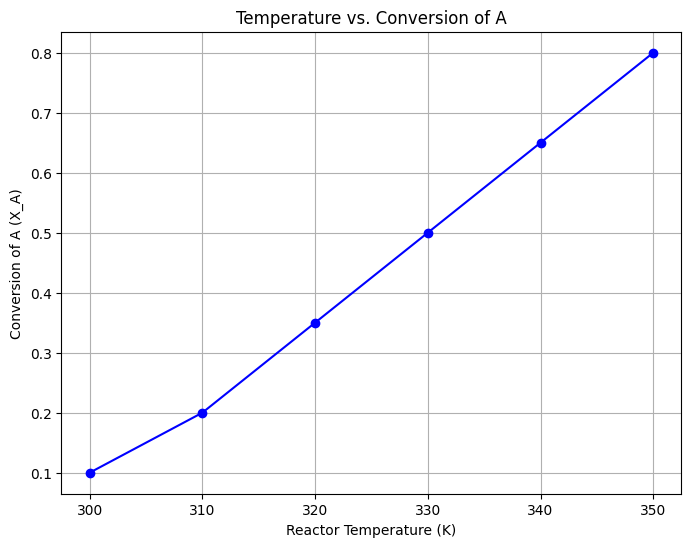

In [12]:
import matplotlib.pyplot as plt

# Example data (Replace with your actual model results)
temperatures = [300, 310, 320, 330, 340, 350]  # Replace with actual data
conversions = [0.1, 0.2, 0.35, 0.5, 0.65, 0.8]  # Replace with actual data

# Plot Temperature vs. Conversion of A
plt.figure(figsize=(8, 6))
plt.plot(temperatures, conversions, marker='o', linestyle='-', color='b')
plt.title("Temperature vs. Conversion of A")
plt.xlabel("Reactor Temperature (K)")
plt.ylabel("Conversion of A (X_A)")
plt.grid(True)
plt.show()
